# 一、线性概念

## （一）变量之间的线性关系

最常使用的线性是指“变量之间的线性关系（linear relationship）”，它表示两个变量之间的关系可以展示为一条直线，即可以使用方程$y=ax+b$来进行拟合。要探索两个变量之间的关系是否是线性的，最简单的方式就是绘制散点图，如果散点图能够相对均匀地分布在一条直线的两端，则说明这两个变量之间的关系是线性的。

## （二）数据的线性与非线性

通常来说，一组数据由多个特征和标签组成。当这些特征分别与标签存在线性关系的时候，就说这一组数据是线性数据。对于线性和非线性数据，最简单的判别方法是利用模型，如果是做分类则使用**逻辑回归**，如果做回归则使用**线性回归**，如果效果好那数据是线性的，效果不好则数据不是线性的。也可以降维后进行绘图，绘制出的图像分布接近一条直线，则数据就是线性的。

在进行分类时，决策函数往往是一个分段函数，比如二分类下的决策函数可以是符号函数$sign(x)$，符号函数的图像可以表示为取值为1和-1的两条直线。这个函数明显不符合可以使用一条直线来进行表示的属性，因此**分类问题中特征与标签[0,1]或者[-1,1]之间关系明显是非线性的关系**。除非在拟合分类的概率，否则不存在例外。

对于回归问题，数据若能分布为一条直线，则是线性的，否则是非线性。对于分类问题，数据分布若能使用一条直线来划分类别，则是线性可分的，否则数据则是线性不可分的。

## （三）线性模型与非线性模型

在回归中，线性数据可以使用如下的方程来进行拟合：$$y=w_0+w_1+x_1+w_2x_2+w_3x_3+...+w_nx_n$$也就是**线性回归方程**。根据线性回归方程，可以拟合出一组参数 ，在这一组固定的参数下可以建立一个模型，而这个模型就被称为是**线性回归模型**。所以建模的过程就是寻找参数的过程。此时建立的线性回归模型是一个**用于拟合线性数据的线性模型**。线性模型的特点是其**自变量都是一次项**。

那线性回归在非线性数据上的表现如何呢？我们来建立一个明显是非线性的数据集，并观察线性回归和决策树回归在拟合非线性数据集时的表现。

### 1.导入所需要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### 2.创建需要拟合的数据集

#### （1）设置随机数种子

In [2]:
rnd = np.random.RandomState(42)

#### （2）随机生成X

In [3]:
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

#### （3）随机生成加噪声的Y

In [4]:
y = np.sin(X) + rnd.normal(size=len(X))/3 #random.normal，生成size个服从正态分布的随机数，/3适当减少噪声

#### （4）散点图

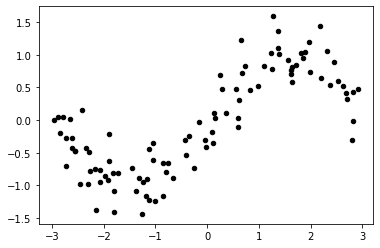

In [5]:
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

#### （5）给X升维，为后续建模做准备

In [6]:
X.shape

(100,)

In [7]:
X = X.reshape(-1, 1) #sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100, 1)

### 3.使用原始数据进行建模

#### （1）建模

In [8]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

#### （2）画图

In [9]:
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) 

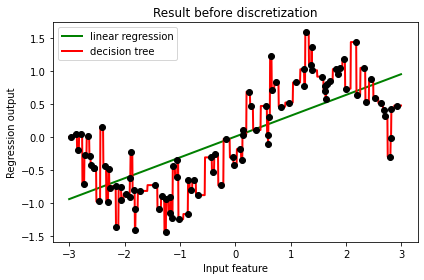

In [10]:
#放置画布
fig, ax1 = plt.subplots(1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green', label='linear regression')
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red', label='decision tree')

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('Input feature')
ax1.set_title('Result before discretization')
plt.tight_layout()
plt.show()

从图像上可以看出，线性回归无法拟合出这条带噪音的正弦曲线的真实面貌，只能够模拟出大概的趋势，而决策树却通过建立复杂的模型将几乎每个点都拟合出来了。可见，使用线性回归模型来拟合非线性数据的效果并不好，而决策树这样的模型却拟合得太细致，但是相比之下，还是决策树的拟合效果更好一些。

根据这个思路也许可以这样推断：**线性模型用于拟合线性数据，非线性模型用于拟合非线性数据**。但事实上机器学习远远比我们想象的灵活得多，**线性模型可以用来拟合非线性数据，而非线性模型也可以用来拟合线性数据**，更神奇的是，有的算法没有模型也可以处理各类数据，而有的模型可以既可以是线性，也可以是非线性模型！

-|线性模型|非线性模型
:-|:-|:-
代表模型|线性回归，逻辑回归，弹性网，感知机|决策树，树的集成模型，使用高斯核的SVM
模型特点|模型简单，运行速度快|模型复杂，效果好，但速度慢
数学特征：回归|自变量是一次项|自变量不都是一次项
分类|决策边界上的自变量都是一次项|决策边界上的自变量不都是一次项
可视化： 回归|拟合出的图像是一条直线|拟合出的图像不是一条直线
分类|决策边界在二维平面是一条直线|决策边界在二维平面不是一条直线
擅长数据类型|主要是线性数据，线性可分数据|所有数据

# 二、使用分箱处理非线性问题

## （一）分箱及分箱的相关问题（10箱）

### 1.导库

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

### 2.训练集

In [12]:
#将数据分箱
enc = KBinsDiscretizer(n_bins=10 #分几类
                      ,encode='onehot') #ordinal：返回一列；onehot：返回n_bins列，对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0
X_binned = enc.fit_transform(X)

In [13]:
X.shape #分箱前

(100, 1)

In [14]:
X_binned #分箱后

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [15]:
#使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#使用分箱后的数据训练模型
LinearR_ = LinearRegression().fit(X_binned, y)

### 3.测试集

In [17]:
#在sklearn中，测试集和训练集的结构必须保持一致，否则报错，因此需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)

In [18]:
line_binned.shape #分箱后的数据是无法进行绘图的

(1000, 10)

In [19]:
line_binned

<1000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [20]:
LinearR_.predict(line_binned).shape

(1000,)

## （二）使用分箱数据进行建模和绘图（10箱）

In [21]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

In [22]:
#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

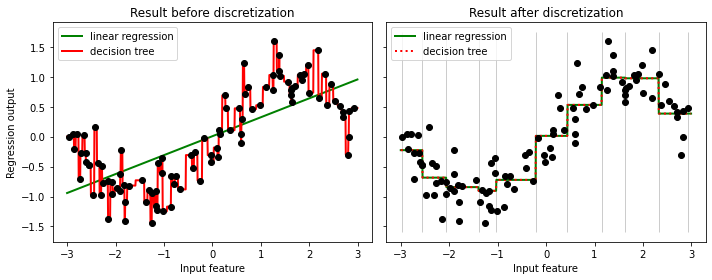

In [23]:
#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
                              ,sharey=True #让两张图共享y轴上的刻度
                              ,figsize=(10, 4))

#在图1中布置在原始数据上建模的结果
ax1.plot(line
        ,LinearR.predict(line)
        ,linewidth=2
        ,color='green'
        ,label='linear regression')
ax1.plot(line
        ,TreeR.predict(line)
        ,linewidth=2
        ,color='red'
        ,label='decision tree')
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('Input feature')
ax1.set_title('Result before discretization')


#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
        ,LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        ,linewidth=2
        ,color='green'
        ,linestyle='-'
        ,label='linear regression')
ax2.plot(line
        ,TreeR_.predict(line_binned)
        ,linewidth=2
        ,color='red'
        ,linestyle=':'
        ,label='decision tree')
#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
          ,*plt.gca().get_ylim() #y轴的上限和下限，*表示把上限和下限这两个数拿来用
          ,linewidth=1
          ,alpha=0.2)
#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')
#其他绘图设定
ax2.legend(loc='best')
ax2.set_xlabel('Input feature')
ax2.set_title('Result after discretization')
plt.tight_layout()
plt.show()

从图像上可以看出，离散化后线性回归和决策树上的预测结果完全相同了——线性回归比较成功地拟合了数据的分布，而决策树的过拟合效应也减轻了。由于特征矩阵被分箱，因此特征矩阵在每个区域内获得的值是恒定的，因此所有模型对同一个箱中所有的样本都会获得相同的预测值。与分箱前的结果相比，线性回归明显变得更加灵活，而决策树的过拟合问题也得到了改善。但一般不用分箱改善决策树过拟合问题，因为树模型带有丰富而有效的剪枝功能来防止过拟合。

In [24]:
enc.bin_edges_ #分出箱子的上限和下限

array([array([-2.9668673 , -2.55299973, -2.0639171 , -1.3945301 , -1.02797432,
       -0.21514527,  0.44239288,  1.14612193,  1.63693428,  2.32784522,
        2.92132162])], dtype=object)

## （三）箱子数对模型结果的影响（5箱）

0.8649069759304867


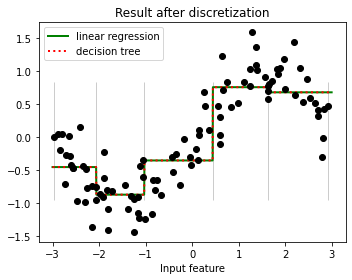

In [25]:
enc = KBinsDiscretizer(n_bins=5,encode='onehot')
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig, ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line #横坐标
        ,LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
        ,linewidth=2
        ,color='green'
        ,linestyle='-'
        ,label='linear regression')
ax2.plot(line
        ,TreeR_.predict(line_binned)
        ,linewidth=2, color='red'
        ,linestyle=':'
        ,label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc='best')
ax2.set_xlabel('Input feature')
ax2.set_title('Result after discretization')
plt.tight_layout()
plt.show()

不如10箱的表现。

## （四）选取最优的箱数

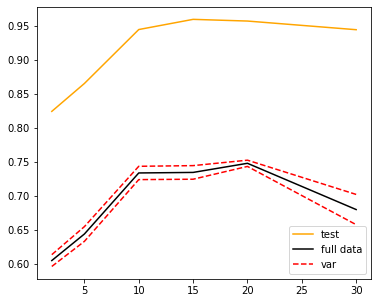

In [26]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode='onehot')
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c='orange',label='test')
plt.plot(binsrange,score,c='k',label='full data')
plt.plot(binsrange,score+np.array(var)*0.5,c='red',linestyle='--',label='var')
plt.plot(binsrange,score-np.array(var)*0.5,c='red',linestyle='--')
plt.legend()
plt.show()

由于样本太少，交叉验证结果比测试结果低不少，但趋势是比较相似的，都是先上升后下降。箱子数为10时，分数都比较好；箱子数为15时，测试集分数很好，交叉验证分数稍有下降；箱子数为20时，测试集数据分数开始下降，交叉验证分数达到最好。对于全数据来说，20箱是最佳分箱数，因为模型方差非常小，最接近均值，分数也是最高的。

在工业中，大量离散化变量与线性模型连用的实例很多，在深度学习出现之前，这种模式甚至一度统治一些工业中的机器学习应用场景，可见效果优秀，应用广泛。对于现在的很多工业场景而言，大量离散化特征的情况可能已经不是那么多了，不过大家依然需要对“分箱能够解决线性模型无法处理非线性数据的问题”有所了解。

# 三、多项式回归PolynomialFeatures

## （一）多项式对数据做了什么

除了分箱之外，另一种更普遍的用于解决“线性回归只能处理线性数据”问题的手段，就是使用多项式回归对线性回归进行改进。这样的手法是机器学习研究者们从**支持向量机**中获得的：支持向量机通过升维可以将非线性可分数据转化为线性可分，然后使用核函数在低维空间中进行计算，这是一种“高维呈现，低维解释”的思维。那也能让线性回归使用类似于升维的转换，将数据由非线性转换为线性，从而为线性回归赋予处理非线性数据的能力。

### 1.PolynomialFeatures类

`sklearn.preprocessing.PolynomialFeatures`(degree=2, interaction_only=False, include_bias=True)

参数|含义
:-|:-
degree|多项式中的次数，默认为2
interaction_only|布尔值，是否只产生交互项，默认为False
include_bias|布尔值，是否产出与截距项相乘的$x_0$，默认为True

In [27]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [28]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [29]:
#二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)

In [30]:
#接口transform直接调用
X_ = poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [31]:
X_.shape

(3, 3)

In [32]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

首先，数据的特征（维度）增加了，符合将数据转换到高维空间的愿望。其次，维度的增加是有一定的规律的。如果本来的特征矩阵中只有一个特征，那么转换后得到：$x_0$、$x$、$x^2$、$x^3$。

多项式回归表达式：$y=w_0x_0+w_1x+w_2x^2+w_3x^3+...+w_nx^n，(x_0=1)$

In [33]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

### 2.截距项

#### （1）带截距项

In [34]:
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx.shape

(3, 4)

In [35]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [36]:
#生成了多少个系数？
LinearRegression().fit(xxx,y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [37]:
#查看截距，截距并不是系数中的值
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

线性回归并没有把多项式生成的$x_0$当作是截距项，所以可以选择关闭多项式回归中的include_bias，也可以选择关闭线性回归中的fit_intercept。

#### （2）不带截距项

In [38]:
#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [39]:
#查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

不过，这只是一维状况的表达，大多数时候的原始特征矩阵不可能会是一维的，至少也是二维以上，很多时候还可能存在上千个特征或者维度。现在我们来看看原始特征矩阵是二维的状况。

### 3.原始特征矩阵是二维

#### （1）一般变化

In [40]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [41]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

$x_0，x_1，x_2，x_1^2，x_1x_2，x_2^2$

$y=w_0+w_1x_1+w_2x_2+w_3x_1x_2+w_4x_1^2+w_5x_2^2$

In [42]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

$x_0，x_1，x_2，x_1^2，x_1x_2，x_2^2，x_1^3，x_1^2x_2，x_1x_2^2，x_2^3$

$y=w_0+w_1x_1+w_2x_2+w_3x_1^2+w_4x_1x_2+w_5x_2^2+w_5x_1^3+w_6x_1^2x_2+w_7x_1x_2^2+w_8x_2^3$

当进行多项式转换的时候，多项式会产出到最高次数为止的所有低高次项。

#### （2）交互项

控制是否要生成平方和立方项的参数interaction_only，默认为False，以减少共线性。

In [43]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [44]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

$x_0，x_1，x_2，x_1x_2$

### 4.更高维

随着多项式的次数逐渐变高，特征矩阵会被转化得越来越复杂。不仅是次数，当特征矩阵中的维度数（特征数）增加的时候，多项式同样会变得更加复杂。

In [45]:
#三维
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [46]:
#二次多项式转化
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [47]:
#三次多项式转化
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [48]:
#20维
X_ = PolynomialFeatures(degree=20).fit_transform(X)

In [49]:
X_.shape

(3, 1771)

随着原特征矩阵的维度上升，随着规定的最高次数的上升，数据会变得越来越复杂，维度越来越多，并且这种维度的增加并不能用太简单的数学公式表达出来。因此，多项式回归没有固定的模型表达式，多项式回归的模型最终长什么样子是由数据和最高次数决定的。

## （二）多项式回归处理非线性问题

### 1.导库

In [50]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

### 2.生成训练和测试数据

In [51]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3

In [52]:
#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)

In [53]:
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

### 3.线性拟合

In [54]:
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)

In [55]:
#对训练数据的拟合
LinearR.score(X,y)

0.5361526059318595

In [56]:
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

### 4.多项式拟合

#### （1）多项式转化（5次）

In [57]:
X_ = PF(degree=5).fit_transform(X) #训练数据
line_ = PF(degree=5).fit_transform(line) #测试数据

#### （2）训练数据的拟合

In [58]:
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

0.8561679370344799

#### （3）测试数据的拟合

In [59]:
LinearR_.score(line_,np.sin(line))

0.9868904451787984

### 5.可视化

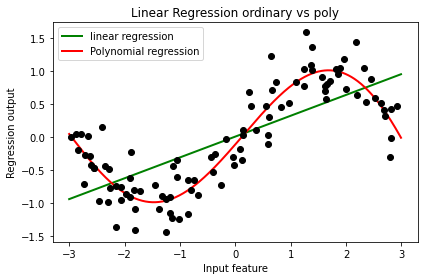

In [60]:
import matplotlib.pyplot as plt
d=5

LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)
#放置画布
fig, ax1 = plt.subplots(1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line
        ,LinearR.predict(line)
        ,linewidth=2
        ,color='green'
        ,label='linear regression')
ax1.plot(line
        ,LinearR_.predict(line_)
        ,linewidth=2
        ,color='red'
        ,label='Polynomial regression')
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc='best')
ax1.set_ylabel('Regression output')
ax1.set_xlabel('Input feature')
ax1.set_title('Linear Regression ordinary vs poly')
plt.tight_layout()
plt.show()

从这里可以看出，多项式回归能够较好地拟合非线性数据，还不容易发生过拟合，可以说是保留了线性回归作为线性模型所带的“不容易过拟合”和“计算快速”的性质，同时又实现了优秀地拟合非线性数据。可以使用交叉验证选择最佳次项。

## （三）多项式回归的可解释性

线性回归是一个具有高解释性的模型，它能够对每个特征拟合出**参数**$w$以帮助我们理解每个特征对于标签的作用。当进行多项式转换后，尽管形成的还是形如线性回归的方程，但随着数据维度和多项式次数的上升，方程也变得异常复杂，可能无法一眼看出增维后的特征是由之前的什么特征组成的（之前都是肉眼看肉眼判断）。不过，多项式回归的可解释性依然是存在的，可以使用接口**get_feature_names**来调用生成的新特征矩阵的各个特征上的名称，以便解释模型。

### 1.get_feature_names

In [61]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [62]:
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [63]:
poly = PolynomialFeatures(degree=5).fit(X) #高次项为5

In [64]:
#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

### 2.加利福尼亚房屋价值

In [65]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [66]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [67]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [68]:
X.columns = ['住户收入中位数','房屋使用年代中位数','平均房间数目','平均卧室数目','街区人口','平均入住率','街区的纬度','街区的经度']
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [69]:
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [70]:
X_ = poly.transform(X)
#使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919548140983327e-08),
 ('住户收入中位数', -11.24302560111705),
 ('房屋使用年代中位数', -0.8488985550865563),
 ('平均房间数目', 6.441059400883809),
 ('平均卧室数目', -31.591330845036552),
 ('街区人口', 0.00040609067821869747),
 ('平均入住率', 1.0038623251695358),
 ('街区的纬度', 8.705681915719547),
 ('街区的经度', 5.880632747311831),
 ('住户收入中位数^2', -0.03130812100951305),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599475393629849),
 ('住户收入中位数 平均房间数目', 0.0433020363878387),
 ('住户收入中位数 平均卧室数目', -0.18614228848200254),
 ('住户收入中位数 街区人口', 5.7283140110601324e-05),
 ('住户收入中位数 平均入住率', -0.0025901945074209877),
 ('住户收入中位数 街区的纬度', -0.15250571869449078),
 ('住户收入中位数 街区的经度', -0.14424294470380816),
 ('房屋使用年代中位数^2', 0.00021172536249781818),
 ('房屋使用年代中位数 平均房间数目', -0.0012621898121656394),
 ('房屋使用年代中位数 平均卧室数目', 0.010611503740612389),
 ('房屋使用年代中位数 街区人口', 2.8188531235643024e-06),
 ('房屋使用年代中位数 平均入住率', -0.001817169463553861),
 ('房屋使用年代中位数 街区的纬度', -0.010069037408715655),
 ('房屋使用年代中位数 街区的经度', -0.009999501833718248),
 ('平均房间数目^2', 0.0072694776784217275),
 ('平均房间数目 平

In [71]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T
coeff.columns = ['feature','coef']
coeff.sort_values(by='coef')

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064


平均卧室数目和住户收入中位数负相关最强，街区的维度和平均房间数目正相关最强。

可以发现，不仅数据的可解释性还存在，还可以通过这样的手段做特征工程——特征创造。多项式帮助我们进行了一系列特征之间相乘的组合，若能够找出组合起来后对标签贡献巨大的特征，那就是创造了新的有效特征，对于任何学科而言发现新特征都是非常有价值的。

顺便可以查看一下多项式变化之后，模型的拟合效果如何了：

In [72]:
#原始数据
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [73]:
#多项式转化
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [74]:
#线性回归
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print('R2:{}'.format(reg_.score(X_,y)))
print('time:{}'.format(time()-time0))

R2:0.7451596609109877
time:0.6146492958068848


In [75]:
#假设使用其他模型如随机森林
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print('R2:{}'.format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print('time:{}'.format(time()-time0))

R2:0.9741724179634547
time:10.642330884933472


线性回归进行多项式变化后被称为多项式回归，但这并不代表多项式变化只能够与线性回归连用。在现实中，多项式变化疯狂增加数据维度的同时，也增加了过拟合的可能性，因此多项式变化多与能够处理过拟合的线性模型如岭回归、Lasso等来连用，与在线性回归上使用的效果是一致的。

## （四）狭义线性模型 VS 广义线性模型

狭义线性模型：自变量上不能有高次项，自变量与标签之间不能存在非线性关系。<br>
广义线性模型：只要标签与模型拟合出的参数之间的关系是线性的，模型就是线性的。只要生成的一系列$w$之间没有相乘或者相除的关系，就认为模型是线性的。